# 9. UPver 5. Tuning parameters of RF

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#load the files

X_train = pd.read_csv('../data/x_y_data/up/X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/up/y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/up/X_test.csv')
y_test = pd.read_csv('../data/x_y_data/up/y_test.csv')
data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')


In [3]:
X_train.shape

(7750, 18)

In [4]:
#set the high-parameter

param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 5],
    'max_depth':[None,3,5],
    'max_features': ['sqrt', 'log2'] # round(sqrt(#cols))
    }

rf = RandomForestClassifier(random_state=12345)

grid_search = GridSearchCV(rf, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 20)
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 2/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 2/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.991) total time=   1.3s
[CV 1/5; 4/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 1/5; 4/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=1.000, test=0.993) total time=   0.6s
[CV 4/5; 4/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 4/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=1.000, test=0.990) total time=   0.6s
[CV 5/5; 5/486] START criterion=gini, max_depth=None, max_feature

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 1/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 1/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=1.000, test=0.988) total time=   0.6s
[CV 2/5; 3/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 3/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=1.000, test=0.993) total time=   1.9s
[CV 2/5; 5/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 5/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.990) total time=   1.3s
[CV 2/5; 7/486] START criterion=gini, max_depth=None, max_featu

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 2/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 2/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.995) total time=   1.2s
[CV 4/5; 3/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 3/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=1.000, test=0.988) total time=   1.8s
[CV 1/5; 6/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 1/5; 6/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=(train=1.000, test=0.992) total time=   1.8s
[CV 3/5; 8/486] START criterion=gini, max_depth=None, max_fea

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 1/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 1/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=1.000, test=0.994) total time=   0.6s
[CV 4/5; 2/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 2/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.989) total time=   1.3s
[CV 3/5; 4/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 4/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=1.000, test=0.995) total time=   0.6s
[CV 3/5; 5/486] START criterion=gini, max_depth=None, max_feature

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 1/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 5/5; 1/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=1.000, test=0.994) total time=   0.6s
[CV 3/5; 3/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 3/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=1.000, test=0.995) total time=   1.9s
[CV 4/5; 5/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 4/5; 5/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.989) total time=   1.3s
[CV 4/5; 6/486] START criterion=gini, max_depth=None, max_featu

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 1/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 1/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=1.000, test=0.995) total time=   0.6s
[CV 5/5; 2/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 2/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.991) total time=   1.3s
[CV 2/5; 4/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 2/5; 4/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=1.000, test=0.992) total time=   0.6s
[CV 5/5; 4/486] START criterion=gini, max_depth=None, max_feature

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 2/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 2/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.993) total time=   1.3s
[CV 5/5; 3/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 3/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=1.000, test=0.992) total time=   1.8s
[CV 2/5; 6/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 2/5; 6/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=(train=1.000, test=0.994) total time=   1.7s
[CV 2/5; 8/486] START criterion=gini, max_depth=None, max_fea

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 1/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 1/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=1.000, test=0.992) total time=   0.6s
[CV 1/5; 3/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 3/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=1.000, test=0.992) total time=   1.9s
[CV 1/5; 5/486] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 5/486] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.992) total time=   1.3s
[CV 1/5; 7/486] START criterion=gini, max_depth=None, max_featu

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 88/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 4/5; 88/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=(train=0.787, test=0.761) total time=   0.5s
[CV 1/5; 90/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 1/5; 90/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=(train=0.781, test=0.781) total time=   1.3s
[CV 4/5; 91/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 91/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.787, test=0.761) total time=   0.4s
[CV 5/5; 92/486] START criterion=gini, max_depth=3, max_features=log2, mi

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 84/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 84/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.781, test=0.781) total time=   1.3s
[CV 2/5; 86/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 86/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=0.784, test=0.777) total time=   0.9s
[CV 5/5; 87/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 87/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=(train=0.773, test=0.790) total time=   1.7s
[CV 3/5; 90/486] START criterion=gini, max_depth=3, max_features=log2, mi

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 83/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 83/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.774, test=0.792) total time=   0.9s
[CV 3/5; 85/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 85/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=0.778, test=0.786) total time=   0.4s
[CV 1/5; 86/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 86/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=0.782, test=0.781) total time=   0.8s
[CV 4/5; 87/486] START criterion=gini, max_depth=3, max_features=log2, min_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 89/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/5; 89/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=0.778, test=0.787) total time=   0.9s
[CV 1/5; 91/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 91/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.781, test=0.783) total time=   0.5s
[CV 1/5; 92/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 92/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.782, test=0.781) total time=   0.9s
[CV 4/5; 93/486] START criterion=gini, max_depth=3, max_features=log2, mi

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 85/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 85/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=0.787, test=0.761) total time=   0.4s
[CV 5/5; 86/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 5/5; 86/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=0.774, test=0.792) total time=   0.9s
[CV 3/5; 88/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 88/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=(train=0.778, test=0.786) total time=   0.7s
[CV 2/5; 89/486] START criterion=gini, max_depth=3, max_features=log2, min_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 87/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 2/5; 87/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=(train=0.781, test=0.774) total time=   1.7s
[CV 5/5; 89/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 5/5; 89/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=0.774, test=0.792) total time=   0.9s
[CV 2/5; 91/486] START criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 91/486] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.783, test=0.777) total time=   0.5s
[CV 5/5; 91/486] START criterion=gini, max_depth=3, max_features=log2, mi

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 169/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 169/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=(train=1.000, test=0.992) total time=   0.9s
[CV 1/5; 170/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 1/5; 170/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.990) total time=   1.9s
[CV 4/5; 171/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 4/5; 171/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=(train=1.000, test=0.985) total time=   2.6s
[CV 2/5; 174/486] START cri

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 162/486] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=(train=0.806, test=0.823) total time=   1.8s
[CV 5/5; 164/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 164/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.992) total time=   2.1s
[CV 3/5; 166/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 166/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=1.000, test=0.994) total time=   1.1s
[CV 2/5; 167/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 167/486] END criterion=entrop

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 165/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 165/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=1.000, test=0.992) total time=   3.5s
[CV 3/5; 168/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 3/5; 168/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=(train=1.000, test=0.994) total time=   2.7s
[CV 1/5; 171/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 1/5; 171/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=(train=1.000, test=0.991) total time=   2.7s
[CV 2/5; 173/486] START crite

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 170/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/5; 170/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.993) total time=   2.0s
[CV 1/5; 172/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 172/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.998, test=0.984) total time=   0.9s
[CV 4/5; 172/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 172/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.998, test=0.970) total time=   0.9s
[CV 5/5; 173/486] START criterion

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 166/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 5/5; 166/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=1.000, test=0.990) total time=   1.1s
[CV 1/5; 168/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 1/5; 168/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=(train=1.000, test=0.991) total time=   3.2s
[CV 2/5; 170/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 170/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.988) total time=   1.9s
[CV 5/5; 171/486] START criteri

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 162/486] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=(train=0.814, test=0.786) total time=   1.8s
[CV 1/5; 165/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 165/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=1.000, test=0.991) total time=   3.2s
[CV 1/5; 167/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 167/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.991) total time=   2.4s
[CV 4/5; 168/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 168/486] END criterion=entr

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 176/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 176/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=0.999, test=0.986) total time=   1.8s
[CV 4/5; 177/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 4/5; 177/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=(train=0.998, test=0.974) total time=   2.6s
[CV 2/5; 180/486] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 2/5; 180/486] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=(train=0.999, test=0.980) total time=   2.8s
[CV 5/5; 182/486] START crite

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 244/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.780, test=0.774) total time=   0.5s
[CV 4/5; 244/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 244/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.787, test=0.761) total time=   0.6s
[CV 1/5; 246/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 246/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.777, test=0.779) total time=   1.9s
[CV 1/5; 248/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 248/486] END criterion=entropy, max_depth=3

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 243/486] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=(train=0.785, test=0.792) total time=   1.4s
[CV 4/5; 245/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 245/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.788, test=0.761) total time=   1.1s
[CV 2/5; 247/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 2/5; 247/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=0.780, test=0.774) total time=   0.8s
[CV 5/5; 247/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 5/5; 247/486] END criterion=entropy, max_depth=

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 245/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 245/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.787, test=0.792) total time=   1.1s
[CV 1/5; 247/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 1/5; 247/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=0.776, test=0.779) total time=   0.8s
[CV 4/5; 247/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 247/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=0.787, test=0.761) total time=   0.6s
[CV 5/5; 248/486] START criterion=entropy, max_depth=

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 248/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 248/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=0.781, test=0.773) total time=   1.3s
[CV 5/5; 249/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 249/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=(train=0.773, test=0.797) total time=   1.7s
[CV 3/5; 252/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 3/5; 252/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=(train=0.785, test=0.792) total time=   2.1s
[CV 5/5; 254/486] START criterion=entropy, max_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 249/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=(train=0.781, test=0.774) total time=   1.9s
[CV 3/5; 251/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/5; 251/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=0.787, test=0.792) total time=   1.2s
[CV 1/5; 253/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 253/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.776, test=0.779) total time=   0.7s
[CV 4/5; 253/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 253/486] END criterion=entropy, max_depth

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 248/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=0.787, test=0.792) total time=   1.3s
[CV 1/5; 250/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 250/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=(train=0.777, test=0.778) total time=   0.6s
[CV 4/5; 250/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 4/5; 250/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=(train=0.787, test=0.761) total time=   0.5s
[CV 5/5; 251/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 5/5; 251/486] END criterion=entropy, max_dep

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 252/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=(train=0.777, test=0.779) total time=   2.0s
[CV 1/5; 254/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 254/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.779, test=0.779) total time=   1.3s
[CV 4/5; 255/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 4/5; 255/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=(train=0.784, test=0.756) total time=   1.5s
[CV 2/5; 258/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 2/5; 258/486] END criterion=entropy, max_dep

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 258/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=(train=0.777, test=0.779) total time=   1.7s
[CV 1/5; 260/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 260/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=0.779, test=0.779) total time=   1.7s
[CV 5/5; 261/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 5/5; 261/486] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=(train=0.773, test=0.797) total time=   1.9s
[CV 3/5; 264/486] START criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=150
[CV 3/5; 264/486] END criterion=entropy, max_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 326/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.995) total time=   1.7s
[CV 1/5; 328/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 1/5; 328/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=1.000, test=0.992) total time=   0.9s
[CV 4/5; 328/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 328/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=1.000, test=0.986) total time=   0.9s
[CV 5/5; 329/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 5/5; 329/486] END criteri

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 332/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/5; 332/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.993) total time=   2.7s
[CV 1/5; 334/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 334/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.998, test=0.984) total time=   1.2s
[CV 4/5; 334/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 334/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.998, test=0.970) total time=   1.3s
[CV 5/5; 335/486] START cri

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 324/486] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=150
[CV 4/5; 324/486] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=(train=0.812, test=0.779) total time=   1.7s
[CV 1/5; 327/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 327/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=1.000, test=0.991) total time=   2.6s
[CV 2/5; 329/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 329/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.991) total time=   2.1s
[CV 5/5; 330/486] START criteri

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 328/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=1.000, test=0.992) total time=   0.9s
[CV 5/5; 328/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 5/5; 328/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=1.000, test=0.990) total time=   0.9s
[CV 1/5; 330/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 1/5; 330/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=(train=1.000, test=0.991) total time=   3.2s
[CV 2/5; 332/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 332/486] END crite

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 334/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.998, test=0.984) total time=   1.2s
[CV 5/5; 334/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 334/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.998, test=0.981) total time=   1.2s
[CV 1/5; 336/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 1/5; 336/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=(train=0.999, test=0.985) total time=   3.4s
[CV 1/5; 338/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 338/486] END criter

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 343/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=(train=0.979, test=0.964) total time=   1.4s
[CV 4/5; 343/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50
[CV 4/5; 343/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=(train=0.977, test=0.943) total time=   1.6s
[CV 5/5; 344/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 5/5; 344/486] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.980, test=0.963) total time=   2.7s
[CV 3/5; 346/486] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50
[CV 3/5; 346/486] END criteri

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

####  Cross validation socre - Accuracy-

In [5]:
rf1= RandomForestClassifier(criterion= 'gini',
 max_depth= None,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 50)

results = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results = cross_val_score(rf1, X_train, y_train, cv=kfold, scoring="accuracy")

results.append(cv_results)
    
msg = f" RF: {cv_results.mean()} ({cv_results.std()})"
print(msg)

 RF: 0.9908387096774194 (0.009507322332794155)


In [6]:
names = ["accuracy"]
results_dict = {name: result for name, result in zip(names, results)}

# Create the DataFrame using the dictionary
score = pd.DataFrame(results_dict)

# Print the DataFrame
display(score)

,accuracy
0,0.980645
1,0.984516
2,0.987097
3,0.978065
4,0.978065
5,1.000000
6,1.000000
7,1.000000
8,1.000000
9,1.000000


In [8]:
#save the score
score.to_csv('../data/score/up/after_tuning_parameter/RF/rf_cross_val_accuracy.csv', index=False)

In [9]:
#save the model
rf1.fit(X_train, y_train)

filename = "../models/ups_ver_rf.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(rf1,file)

#### Cross validation socre - Recall-

In [10]:
results2 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results2 = cross_val_score(rf1, X_train, y_train, cv=kfold, scoring="recall")

results2.append(cv_results2)
    
msg2 = f" RF: {cv_results2.mean()} ({cv_results2.std()})"
print(msg2)

 RF: 0.5 (0.5)


In [11]:
names2 = ["recall"]
results_dict2 = {name2: result2 for name2, result2 in zip(names2, results2)}

# Create the DataFrame using the dictionary
score2 = pd.DataFrame(results_dict2)

# Print the DataFrame
display(score2)

,recall
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [12]:
score2.to_csv('../data/score/up/after_tuning_parameter/RF/rf_cross_val_recall.csv', index=False)

#### Cross validation socre -Precision-

In [13]:
results3 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results3 = cross_val_score(rf1, X_train, y_train, cv=kfold, scoring="precision")

results3.append(cv_results3)
    
msg3 = f" RF: {cv_results3.mean()} ({cv_results3.std()})"
print(msg3)

 RF: 0.5 (0.5)


In [14]:
names3 = ["precision"]
results_dict3 = {name3: result3 for name3, result3 in zip(names3, results3)}

# Create the DataFrame using the dictionary
score3 = pd.DataFrame(results_dict3)

# Print the DataFrame
display(score3)

,precision
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [15]:
score3.to_csv('../data/score/up/after_tuning_parameter/RF/rf_cross_val_precision.csv', index=False)

#### Cross validation socre -F1-

In [16]:
results4 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results4 = cross_val_score(rf1, X_train, y_train, cv=kfold, scoring="f1")

results4.append(cv_results4)
    
msg4 = f" RF: {cv_results4.mean()} ({cv_results4.std()})"
print(msg4)

 RF: 0.5 (0.5)


In [17]:
names4 = ["f1"]
results_dict4 = {name4: result4 for name4, result4 in zip(names4, results4)}

# Create the DataFrame using the dictionary
score4 = pd.DataFrame(results_dict4)

# Print the DataFrame
display(score4)

,f1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [18]:
score4.to_csv('../data/score/up/after_tuning_parameter/RF/rf_cross_val_f1.csv', index=False)

### Variable Importance 

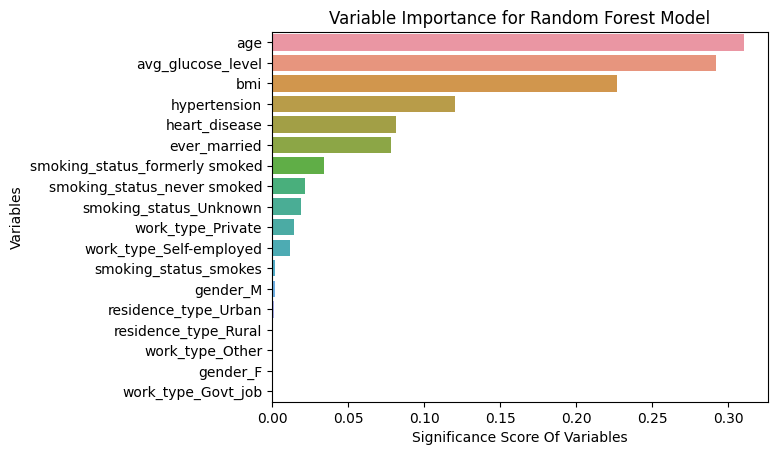

[CV 2/5; 401/486] END criterion=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=(train=0.781, test=0.773) total time=   1.0s
[CV 5/5; 402/486] START criterion=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=150
[CV 5/5; 402/486] END criterion=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=150;, score=(train=0.774, test=0.797) total time=   1.3s
[CV 3/5; 405/486] START criterion=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=150
[CV 3/5; 405/486] END criterion=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=150;, score=(train=0.785, test=0.792) total time=   1.3s
[CV 4/5; 407/486] START criterion=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 407/486] END criterion=log_loss,

In [19]:
X_train2 = pd.read_csv('../data/x_y_data/up/X_resampled.csv')
y_train2 = pd.read_csv('../data/x_y_data/up/y_resampled.csv')


rf_tuned = rf1.fit(X_train2, y_train2)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(rf1, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Random Forest Model")
plt.show()


#####  The level of 'age' and 'glucose' is very high, compared to 'KNN'

In [20]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df

,0
age,0.310619
avg_glucose_level,0.291690
bmi,0.226877
hypertension,0.120387
heart_disease,0.081277
ever_married,0.078077
smoking_status_formerly smoked,0.034503
smoking_status_never smoked,0.021445
smoking_status_Unknown,0.018903
work_type_Private,0.014452


In [21]:
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df.head(2)

,Significance Score
age,0.310619
avg_glucose_level,0.291690


In [22]:
feature_importances_df.to_csv('../data/score/up/Significant_Score/RF_Significance_Score.csv', index=False)

### the classification report

In [23]:
from sklearn.metrics import confusion_matrix


y_pred = rf1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[959,  13],
       [ 45,   3]])

In [24]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    1004
1      16
Name: count, dtype: int64

In [25]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

stroke
0         972
1          48
Name: count, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = rf1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.943137
1,Precision,0.187500
2,Recall,0.062500
3,F1-Score,0.093750
4,Kappa,0.071913


In [27]:
metrics_df.to_csv('../data/metrics/up/rf_metrics.csv', index=False)